In [49]:
import random

**BMI 분류**

In [50]:
fp = open("DataSet/bmi.csv", mode="w", encoding="utf-8")

In [51]:
fp.write("height,weight,label\r\n")
cnt={"thin":0, "normal":0, "fat":0}

def calc_bmi(h,w):
    bmi = w/(h/100)**2
    if bmi < 18.5: return "thin"
    if bmi < 25 : return "normal"
    return "fat"

for i in range(20000):
    h=random.randint(130, 200)
    w=random.randint(35,100)
    label = calc_bmi(h,w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h,w,label))
fp.close()
print("완료, ", cnt)

완료,  {'thin': 5065, 'normal': 5408, 'fat': 9527}


* * *

In [52]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
tb1 = pd.read_csv("DataSet/bmi.csv")
tb1.head(10)

,height,weight,label
0,151,67,fat
1,160,73,fat
2,177,85,fat
3,179,55,thin
4,149,85,fat
5,196,72,normal
6,137,67,fat
7,199,60,thin
8,180,76,normal
9,176,83,fat


In [54]:
label = tb1["label"]
w = tb1["weight"]/100
h = tb1["height"]/200
wh = pd.concat([w,h], axis = 1)

# 학습용/테스트용으로 데이터 분리
data_train, data_test, label_train, label_test = train_test_split(wh, label)

clf = svm.SVC() #svm 객체 생성
clf.fit(data_train, label_train) #모델생성

predict = clf.predict(data_test)

ac_score = metrics.accuracy_score(label_test, predict)
print("정답률 = ", ac_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


정답률 =  0.9872


In [55]:
cl_report = metrics.classification_report(label_test, predict)
print("[리포트]\n", cl_report)

[리포트]
               precision    recall  f1-score   support

         fat       1.00      0.99      0.99      2389
      normal       0.97      0.99      0.98      1347
        thin       0.99      0.98      0.98      1264

   micro avg       0.99      0.99      0.99      5000
   macro avg       0.98      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



* * *

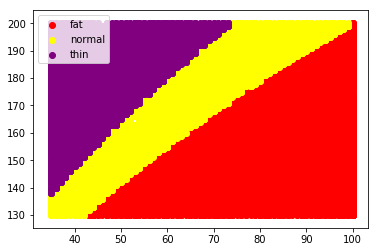

In [56]:
tbl=pd.read_csv('DataSet/bmi.csv',index_col=2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) # figure을 여러개로 나눔 칸한개
def scatter(lbl,color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'],b['height'],c=color,label = lbl)

scatter('fat','red')
scatter('normal','yellow')
scatter('thin','purple')
ax.legend()
plt.savefig('DataSet/bmi.png')
plt.show()